In [5]:
import os 
parent = os.path.dirname(os.getcwd())
os.chdir(parent)
print(os.getcwd())

/kyb/rg/akipnis/Nextcloud/Code/compositional-inference-experiment/psychopy-implementation


### Imports and helpers

In [6]:
import matplotlib.pyplot as plt
from ExperimentTools import Experiment
exp = Experiment()

def getTrials(participant:int) -> tuple:
    exp.dialogue_box(show=False, participant=participant, session=2, meg=False, test_mode=False)
    exp.load_trials()
    return exp.trials_prim, exp.map_names 

def positionsChanged(trial:dict) -> list:
    inputDisp = trial['input_disp']
    intermediateDisp = trial['intermediate_disp']
    outputDisp = trial['output_disp']
    indices_1 = [i for i, j in enumerate(inputDisp) if j != intermediateDisp[i]]
    indices_2 = [i for i, j in enumerate(intermediateDisp) if j != outputDisp[i]]
    return indices_1 + indices_2

def viewTrial(trial:dict) -> None:
    print(f"Spell: {';'.join(trial['map'])}")
    print(f"Input: {trial['input_disp']}")
    if trial["map_type"] != "primitive":
        print(f"Intermediate: {trial['intermediate_disp']}")
    print(f"Output: {trial['output_disp']}")
    print(f"Indices changed: {positionsChanged(trial)}")

Loading psychopy...


#### example trial

In [7]:
compositionalTrials, uniqueSpells = getTrials(1)
viewTrial(compositionalTrials[0])
print(compositionalTrials[0].keys())

Loading trials...
Spell: C-D
Input: ['A' 'D' 'D' 'C']
Output: ['A' 'D' 'D' 'D']
Indices changed: [3]
dict_keys(['trial_type', 'map_type', 'test_type', 'map', 'input_disp', 'intermediate_disp', 'output_disp', 'target', 'resp_options', 'correct_resp', 'trans_ub', 'trans_lb', 'jitter'])


## 1. Position changes per spell

In [8]:
def analyzePositionFrequency(trials:list) -> None:
    positionsDict = {spell: [] for spell in uniqueSpells}
    uniquePositions = set()
    for trial in trials:
        spell = '+'.join(trial['map'])
        changed = positionsChanged(trial)
        changed = '-'.join([str(i) for i in changed])
        uniquePositions.add(changed)
        positionsDict[spell].append(changed)
    uniquePositions = sorted(list(uniquePositions))
    
    # for each spell, plot the number of times each position was changed
    plt.figure(figsize=(20, 10))
    for i, spell in enumerate(uniqueSpells):
        plt.subplot(2, 4, i+1)
        plt.title(spell)
        plt.xlabel("Position")
        plt.ylabel("Count")
        plt.xticks(range(len(uniquePositions)), uniquePositions, rotation=90)
        plt.ylim(0, 40)
        plt.hist(positionsDict[spell], bins=len(uniquePositions))

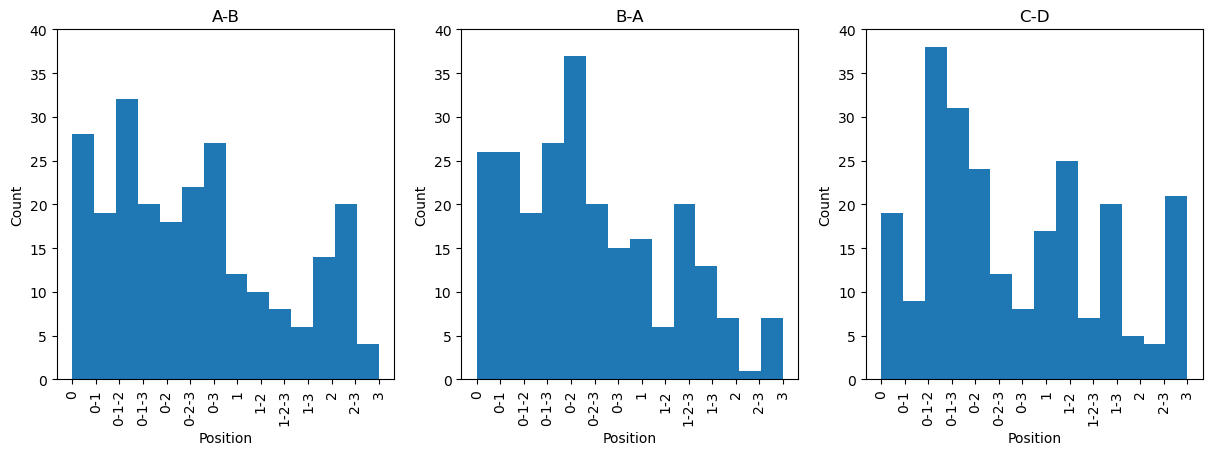

In [9]:
analyzePositionFrequency(compositionalTrials)

## 2. Response button per spell

In [10]:
def analyzeResponseFrequency(trials:list) -> None:
    correctResponseDict = {spell: [] for spell in uniqueSpells}
    for trial in trials:
        spell = '+'.join(trial['map'])
        correctResponse = trial['correct_resp']
        correctResponseDict[spell].append(correctResponse)
    
    plt.figure(figsize=(20, 10))
    for i, spell in enumerate(uniqueSpells):
        plt.subplot(2, 4, i+1)
        plt.title(spell)
        plt.xlabel("Button of correct response")
        plt.ylabel("Count")
        plt.xticks(range(4), ['1', '2', '3', '4'])
        plt.hist(correctResponseDict[spell], bins=4)

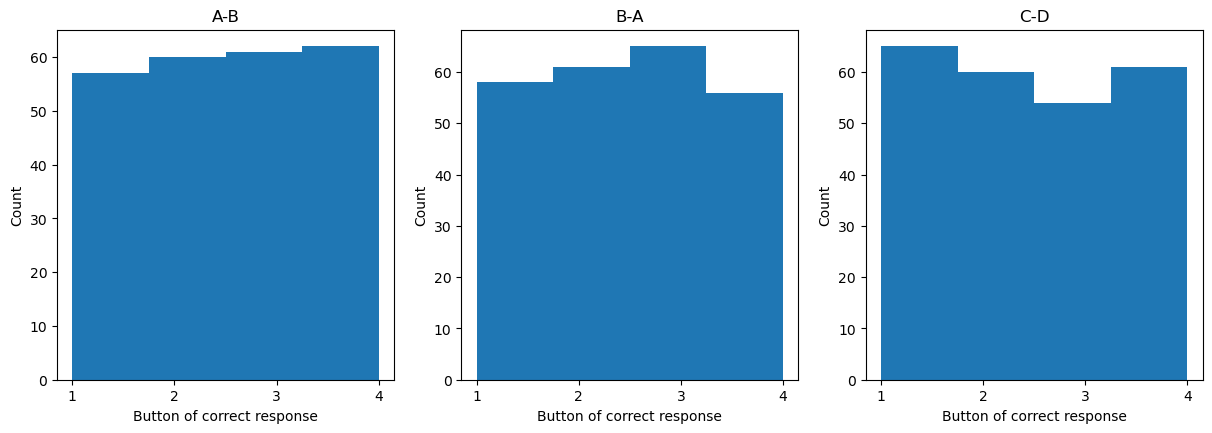

In [11]:
analyzeResponseFrequency(compositionalTrials)

## 3. Test target per spell

In [12]:
def analyzeTargetFrequency(trials:list) -> None:
    targetDict = {spell: [] for spell in uniqueSpells}
    uniqueTargets = set()
    for trial in trials:
        spell = '+'.join(trial['map'])
        target = trial['target']
        uniqueTargets.add(str(target))
        targetDict[spell].append(target)
    uniqueTargets = sorted(list(uniqueTargets))
    
    plt.figure(figsize=(20, 10))
    for i, spell in enumerate(uniqueSpells):
        plt.subplot(2, 4, i+1)
        plt.title(spell)
        plt.xticks(range(len(uniqueTargets)), uniqueTargets)
        plt.ylim(0, 85)
        plt.xlabel("Test Target (Position or Object)")
        plt.ylabel("Count")
        plt.hist(targetDict[spell], bins=4)

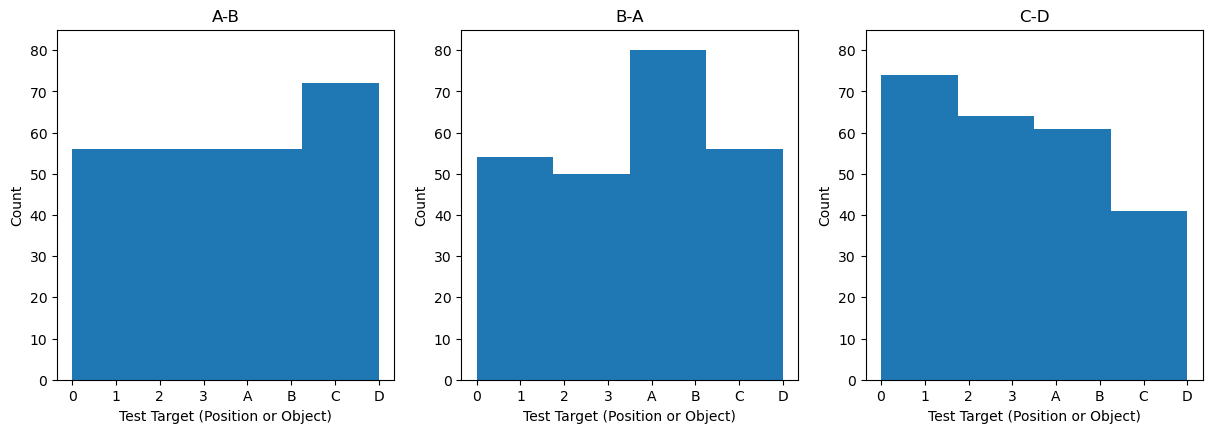

In [14]:
analyzeTargetFrequency(compositionalTrials)